## IPBMA_5: Projection Radiography
### Author: Liu Cong and Ulloa Ferrer,Leonardo

In [213]:
import numpy as np
import matplotlib.pyplot as pyplot
import sys, os

try:
    auxFnc = os.path.join(sys.path[0], 'auxFiles', 'auxFnc.py')
    phantomsFnc = os.path.join(sys.path[0], 'auxFiles', 'phantomsFnc.py')
    plotFnc = os.path.join(sys.path[0], 'auxFiles', 'plotFnc.py')
    %run {auxFnc}
    %run {phantomsFnc}
    %run {plotFnc}
except:
    auxFnc = os.path.join('.', 'auxFiles', 'auxFnc.py')
    phantomsFnc = os.path.join('.', 'auxFiles', 'phantomsFnc.py')
    plotFnc = os.path.join('.', 'auxFiles', 'plotFnc.py')
    %run {auxFnc}
    %run {phantomsFnc}
    %run {plotFnc}

### SOURCE

In [214]:
# source(kVp, N0)
# return number of photoms (N0), efective energy (eE)

kVp= 40
I0= 250
N0, eE= source(kVp, I0)

print(N0, eE)

250 16.0


#### CUBE PHANTOM

In [215]:
# OBJECT
# phantom(size, eE)
# return phantomData

size= 256
obj= cube_phantom_nh(size, eE)

1.62 0.0 1.5


### QUANTUM IMAGE. FRONTAL VIEW.

In [216]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'frontal'
# prj = 'lateral'
qImage= interactor_PR(N0, obj, prj)

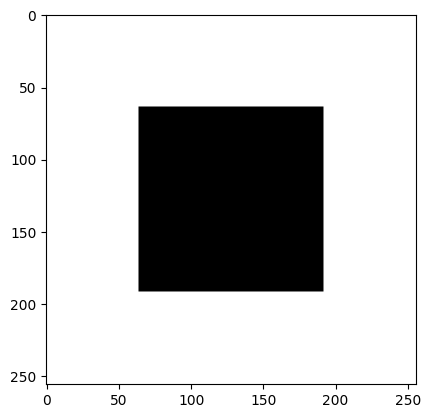

In [217]:
pyplot.imshow(qImage, cmap="gray")
pyplot.show()

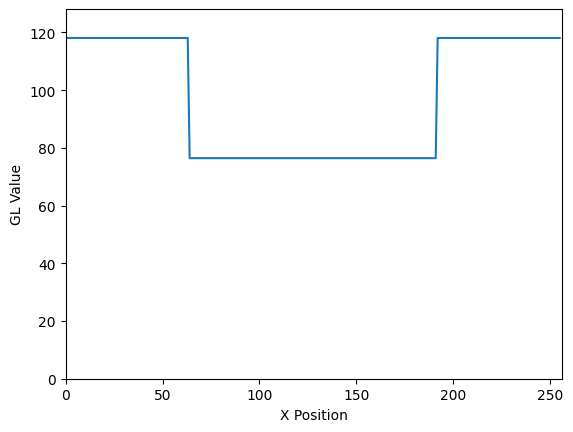

In [218]:
plotLineH(qImage, 128)

In [219]:
# Get Number of Photoms

nSI= N0*size*size
print(f'Number of Photons (From the source): {nSI:d}')

nQI= getNumberPhotons(qImage)
print(f'Number of Photons (Quantum image): {nQI:d}')

assert nSI > nQI, "Something wrong happens"

Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 7056776


In [220]:
# Get Distribution of the Photons per Cell

nPC= getNumberPhotonsCell(qImage, N0)
print(nPC[1].shape)
print(f'Number of Photons (Quantum image): {int(sum(nPC[1])):d}')

(251,)
Number of Photons (Quantum image): 7045120


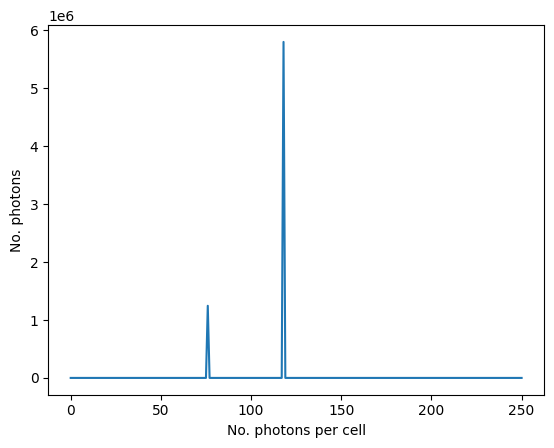

In [221]:
plotDistribution(nPC, 'No. photons per cell', 'No. photons')

In [222]:
# Get Distribution of cells per Photons

nCP= getNumberCellsPhoton(qImage, N0)
print(f'Number of Cells (Quantum image): {int(sum(nCP[1])):d}')

Number of Cells (Quantum image): 65536


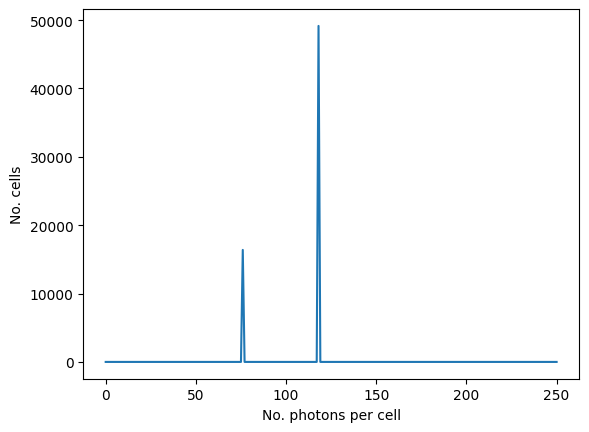

In [223]:
plotDistribution(nCP, 'No. photons per cell', 'No. cells')

### QUANTUM IMAGE. LATERAL VIEW.

In [224]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'lateral'
qImage= interactor_PR(N0, obj, prj)

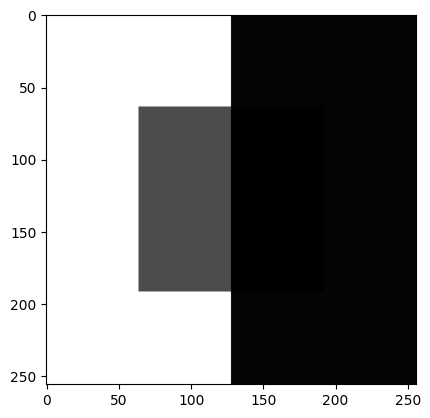

In [225]:
pyplot.imshow(qImage, cmap="gray")
pyplot.show()

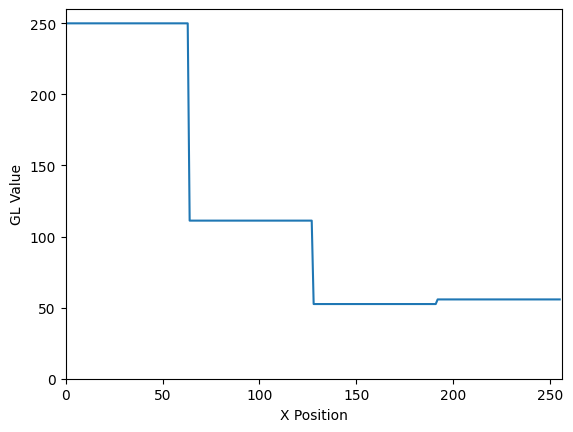

In [226]:
plotLineH(qImage, 128)

In [227]:
# Get Number of Photoms

nSI= N0*size*size
print(f'Number of Photons (From the source): {nSI:d}')

nQI= getNumberPhotons(qImage)
print(f'Number of Photons (Quantum image): {nQI:d}')

assert nSI > nQI, "Something wrong happens"

Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 8856339


In [228]:
# Get Distribution of the Photons per Cell

nPC= getNumberPhotonsCell(qImage, N0 + 3*int(np.sqrt(N0)))
print(f'Number of Photons (Quantum image): {int(sum(nPC[1])):d}')

Number of Photons (Quantum image): 8830976


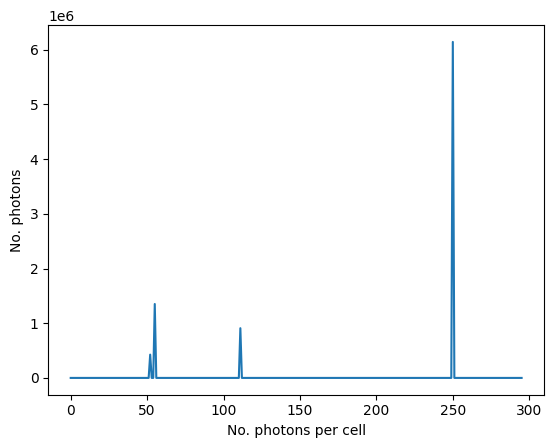

In [229]:
plotDistribution(nPC, 'No. photons per cell', 'No. photons')

In [230]:
# Get Distribution of cells per Photons

nCP= getNumberCellsPhoton(qImage, N0 + 3*int(np.sqrt(N0)))
print(f'Number of Cells (Quantum image): {int(sum(nCP[1])):d}')

Number of Cells (Quantum image): 65536


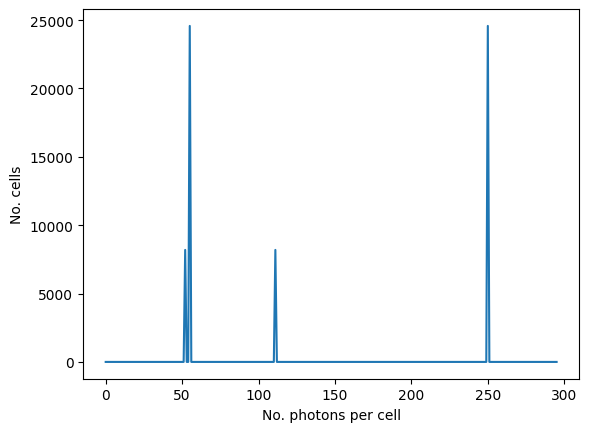

In [231]:
plotDistribution(nCP, 'No. photons per cell', 'No. cells')

### DETECTED IMAGE

In [232]:
# Detection
# dImage -> The detected image, under the hypothesis of Poisson distribution.
dImage= detectorNoiseP_1_1(qImage)

N Cells: 256 256


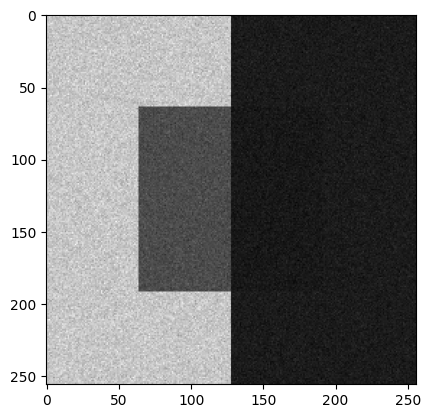

In [233]:
pyplot.imshow(dImage, cmap="gray")
pyplot.show()

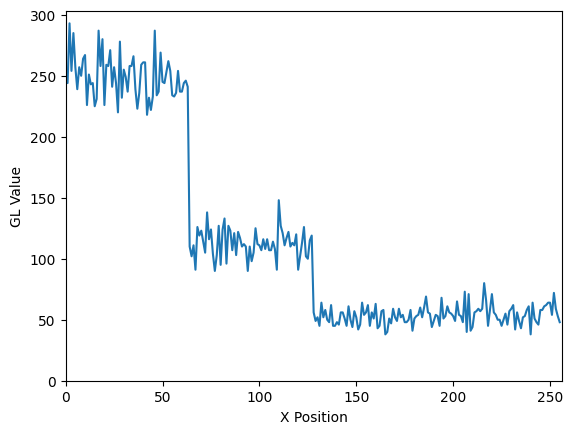

In [234]:
plotLineH(dImage, 128)

In [235]:
# Get Number of Photoms

nSI= N0*size*size
print(f'Number of Photons (From the source): {nSI:d}')

nQI= getNumberPhotons(qImage)
print(f'Number of Photons (Quantum image): {nQI:d}')

nDI= getNumberPhotons(dImage)
print(f'Number of Photons (Detected image): {nDI:d}')

assert nSI > nQI > nDI, "Something wrong happens"

Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 8856339
Number of Photons (Detected image): 8852845


In [236]:
# Get Distribution of the Photons per Cell

nPCD= getNumberPhotonsCell(dImage, N0 + 3*int(np.sqrt(N0)))
print(f'Number of Photons (Detected image): {int(sum(nPCD[1])):d}')

Number of Photons (Detected image): 8837845


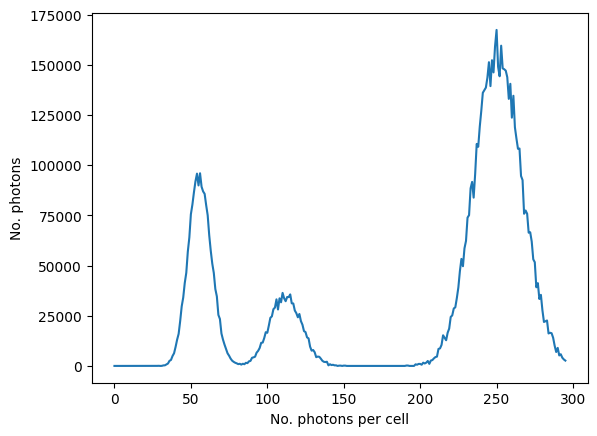

In [237]:
plotDistribution(nPCD, 'No. photons per cell', 'No. photons')

In [238]:
# Get Distribution of cells per Photons

nCPD= getNumberCellsPhoton(dImage, N0 + 3*int(np.sqrt(N0)))
print(f'Number of Cells (Detected image): {int(sum(nCPD[1])):d}')

Number of Cells (Detected image): 65486


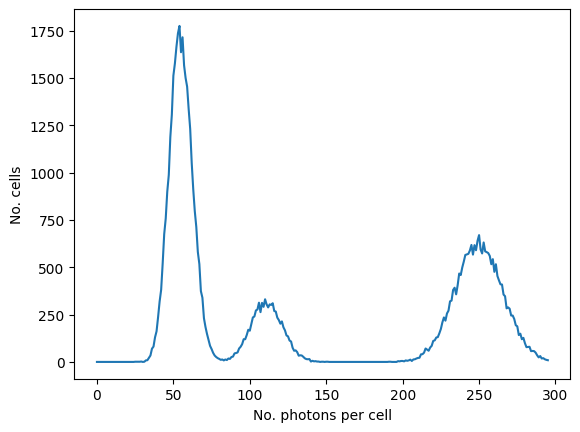

In [239]:
plotDistribution(nCPD, 'No. photons per cell', 'No. cells')

### EXPERIMENTS

### Experiment 1. Baseline.

In [240]:
# Source Data 1

kVp= 30
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)

250 12.0


In [241]:
# OBJECT

size= 256
obj= cube_phantom_nh(size, eE)

4.14 0.0 3.87


In [246]:
# Interaction

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

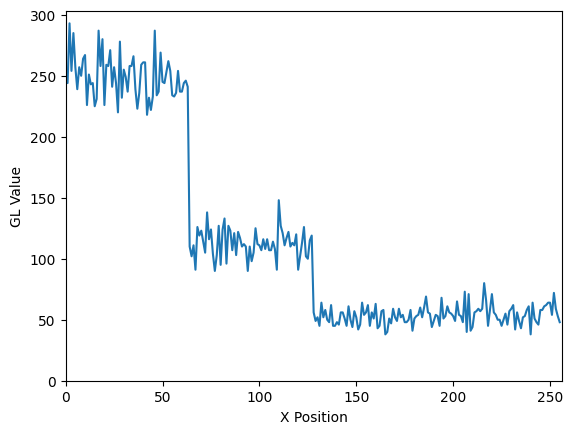

In [247]:
plotLineH(dImage, 128)